## Линейная регрессия. MSE<a class="anchor" id="1">

In [ ]:
y = ax + a1x1 + a2x2 + a3x3 + b

<img src='https://neurohive.io/wp-content/uploads/2018/10/lineinaja-regressija-e1539097909123.png' width=500>

Линейные модели - это такие модели, которые сводятся к суммированию значений признаков с некоторыми весами. Само название модели говорит о том, что зависимость предсказываемой переменной от признаков будет линейной:

$$a(x) = w_{0}+\sum^{d}_{i=1}w_{i}x_{i}.$$

**Линейная регрессия** — модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости.

В данном случае параметрами моделей являются веса $w_{i}$. Вес $w_{0}$ называется _свободным коэффициентом_ или _сдвигом_. Оптимизация модели в таком случае заключается в подборе оптимальных значений весов. Сумму в формуле также можно описать как скалярное произведение вектора признаков $x=(x^{1},...,x^{d})$ на вектор весов $w=(w_{1},...,w_{d})$:

$$a(x) = w_{0}+\left \langle w,x \right \rangle.$$


<img src="https://drive.google.com/uc?id=1KxpLcCrRB5vhQiZb1J1NR6gwwyMBSVZ3">

Обратим внимание, что сдвиг делает модель неоднородной и затрудняет ее дальнейшую оптимизацию. Для устранения этого фактора обычно используют прием, позволяющий упростить запись: к признаковому описанию объекта добавляется еще один признак (константный), на каждом объекте равный единице. В этом случае вес при нем как раз будет по смыслу совпадать со свободным коэффициентом, и сам $w_{0}$ будет не нужен. Тогда получим

$$a(x) = \sum^{d+1}_{i=1}w_{i}x_{i}=\left \langle w,x \right \rangle.$$

За счет простой формы линейные модели достаточно легко обучаются и позволяют работать с зашумленными данными, небольшими выборками, контролирауя при этом риск переобучения.

### Практика. Регрессия "из коробки".
<p id="3">Посмотрим линейные модели на практике. Будем решать задачу предсказания цены автомобиля, в зависимости от признаков.</p>

In [1]:
import numpy as np
import operator
import pandas as pd # Для работы с данными
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

In [2]:
from sklearn.linear_model import LinearRegression # линейная регрессия

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/ahartz1/car-linear-regression/master/car_data.csv', delimiter=',')
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
data.shape

(804, 12)

<p>Самое простое предположение. Цена автомобиля зависит от пробега.</p>

In [5]:
X = data[['Mileage']] # пробег
Y = data['Price']

In [6]:
X.shape

(804, 1)

In [7]:
Y

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [8]:
model = LinearRegression()
model.fit(X, Y) # метод фит - метод обучения модели

LinearRegression()

In [9]:
model.coef_

array([-0.1725205])

In [10]:
model.intercept_

24764.559006061685

In [11]:
y_predict = model.predict(X) # получаем предсказанное значение

In [12]:
Y = data.loc[:, ['Price']]
Y.head() # предсказываемая цена

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


In [13]:
y_predict[:5]

array([23346.26795261, 23188.58421306, 22487.97845123, 21945.22894945,
       21343.13239471])

In [14]:
X.iloc[0].values * model.coef_ + model.intercept_

array([23346.26795261])

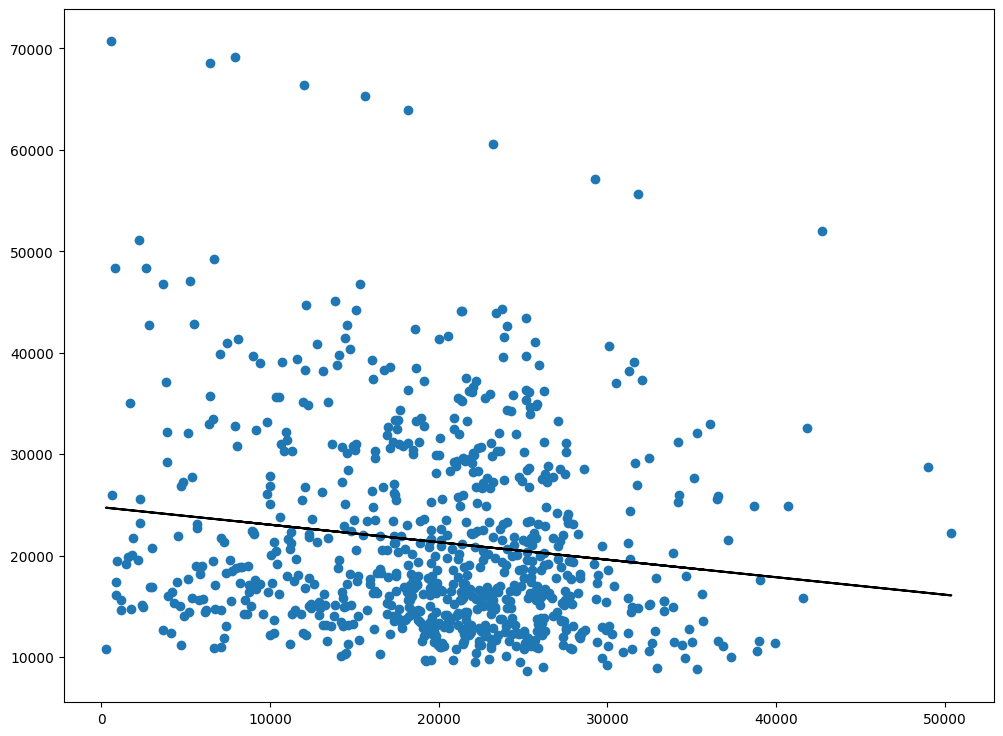

In [15]:
plt.figure(figsize=(12,9))
plt.plot(X, Y, 'o')
plt.plot(X, y_predict, 'k-')
plt.show()

<p>Несмотря на то, что зависимость от пробега наблюдаема, но она не столь существенна, чтобы эффективно описать данные, как видим на графике. Нужно что-то поумнее.</p>

In [16]:
# будем использовать набор данных, а не только пробег
X = data.loc[:, ['Mileage', 'Liter']]
X.head()

,Mileage,Liter
0,8221,3.1
1,9135,3.1
2,13196,3.1
3,16342,3.1
4,19832,3.1


In [17]:
Y = data.loc[:, ['Price']]
Y.head() # предсказываемая цена

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


### 🧠 Упражнение 1

1. Инициализируйте модель Линейной регрессии
2. Обучите модель
3. Сделайте предсказаний на одном объекте
    * Через перемножение признаков на коэффициенты
    * Через метод `predict`
4. Визуализируйте предсказания и истинные значения через точеченый график, где по оси X находятся индексы объектов, а по оси Y - предсказания

In [18]:
X.iloc[0]

Mileage    8221.0
Liter         3.1
Name: 0, dtype: float64

#### 🧠 Упражнение 1. Ответ


1. Инициализируйте модель Линейной регрессии
2. Обучите модель

In [19]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

3. Сделайте предсказаний на одном объекте
    * Через перемножение признаков на коэффициенты
    * Через метод `predict`


In [20]:
X.iloc[0]

Mileage    8221.0
Liter         3.1
Name: 0, dtype: float64

In [21]:
np.sum(X.iloc[0].values * model.coef_) + model.intercept_

array([23512.66895659])

In [22]:
model.predict(X.iloc[:1])

array([[23512.66895659]])


4. Визуализируйте предсказания и истинные значения через точеченый график, где по оси X находятся индексы объектов, а по оси Y - предсказания

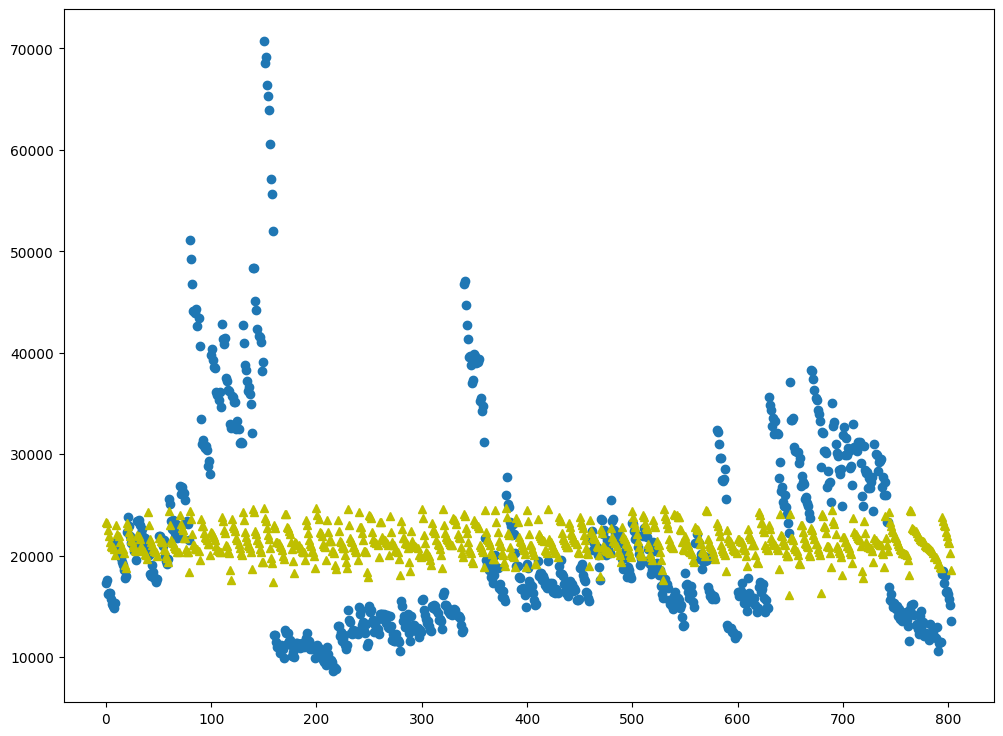

In [23]:
plt.figure(figsize=(12,9))
plt.plot(Y.index, Y, 'o')
plt.plot(Y.index, y_predict, 'y^')
plt.show() # видим как цена действительно накладывается на истину

## Метод наименьших квадратов<a class="anchor" id="2">

Как уже говорилось ранее, обучение модели регрессии заключается в минимизации функционала ошибки. Таким образом, в случае использования среднеквадратичной ошибки получаем задачу оптимизации

$$Q(w,x) = \frac{1}{l}\sum^{l}_{i=1}(\left \langle w,x_{i} \right \rangle-y_{i})^{2} \rightarrow \underset{w}{\text{min}}.$$

Способ вычисления весов путем минимизации среднеквадратичного отклонения называется **методом наименьших квадратов**.

Заметим, что здесь мы переписали выражение функционала ошибки, заменив $a(x)$ на скалярное призведение $\left \langle w,x \right \rangle$, после чего мы уже имеем функцию, а не функционал ошибки, так как $Q$ зависит не от некоторой функции $a(x)$, а от вектора весов $w$, и оптимизировать нужно именно по нему, что гораздо проще.

Имеет смысл переписать имеющиеся соотношения в матричном виде. В матрицу "объекты-признаки" впишем по строкам $d$ признаков для всех $l$ объектов из обучающей выборки:

$$X = \begin{pmatrix}
x_{11} & ... & x_{1d}\\
... & ... & ...\\
x_{l1} & ... & x_{ld}
\end{pmatrix},$$

и составим вектор ответов $y$ из истинных ответов для данной выборки:

$$y = \begin{pmatrix}
y_{1}\\
...\\
y_{l}
\end{pmatrix}.$$

Помня, что $w$ - вектор параметров, переписанная в матричном виде задача будет выглядеть следующим образом:

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}},$$

где используется евклидова ($L_{2}$) норма:

$$||x|| = \sqrt{\sum_{i=1}^l{x_i^2}} $$

$$||Xw-y|| = \sqrt{\sum_{i=1}^l{(X_iw-y_i)^2}} $$

$$Q(w, X) = \frac{1}{l}\sqrt{\sum_{i=1}^l{(X_iw-y_i)^2}} ^{2} = \frac{1}{l}\sum_{i=1}^l{(X_iw-y_i)^2}$$


$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$

$\frac{2}{l}X^{T}(Xw-y) = 0$

$X^{T}(Xw-y) = 0$

$X^{T}Xw-X^{T}y = 0$

$w = \frac{X^{T}y}{X^{T}X}$

$w = (X^{T}X)^{-1}X^{T}y $


Продифференцировав данную функцию по вектору $w$ и приравняв к нулю, можно получить явную анатилическую формулу для решения задачи минимизации ([ссылка  (см. пункт 1.2)](https://habr.com/ru/company/ods/blog/323890/#metod-naimenshih-kvadratov) на подробный вывод аналитической формулы решения уравнения линейной регрессии):

$$w = (X^{T}X)^{-1}X^{T}y.$$

Это решение называется _нормальным уравнением_ линейной регрессии. Наличие аналитического решения кажется положительным фактором, однако, у него есть некоторые минусы, среди которых вычислительная сложность операции (обращение матрицы $X^{T}X$ будет иметь кубическую сложность от количества признаков $d^{3}$), а также тот факт, что матрица $X^{T}X$ может быть вырожденной и поэтому необратимой. Тогда найти решение будет невозможно.


Более удобным подходом будет разработка решения с помощью численных методов оптимизации, одним из которых является _градиентный спуск_.

## Градиентный спуск<a class="anchor" id="3">

Среднеквадратичная ошибка имеет один минимум и непрерывна на всей области значений (то есть является выпуклой и гладкой), а значит в каждой ее точке можно посчитать частные производные.

Вспомним, что _градиентом_ функции $f$ называется $n$-мерный вектор из частных производных.

$$ \nabla f(x_{1},...,x_{d}) = \left(\frac{\partial f}{\partial x_{i}}\right)^{d}_{i=1}.$$

При этом известно, что __градиент задает направление наискорейшего роста функции__. Значит, антиградиент будет показывать направление ее скорейшего убывания, что будет полезно нам в нашей задаче минимизации функционала ошибки.

**Градиентный спуск** — метод нахождения локального экстремума функции (минимума или максимума) с помощью движения вдоль градиента.

In [ ]:
df(x1, x2, x3) = (df(x1), df(x2), df(x3))

Для решения задачи нам требуется определить некоторую стартовую точку и итерационно сдвигаться от нее в сторону антиградиента с определенным _шагом_ $\eta_{k}$, на каждом шагу пересчитывая градиент в точке, в которой мы находимся. Таким образом, имея начальный вектор весов $w^{0}$, $k$-й шаг градиентного спуска будет иметь вид

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$


Итерации следует продолжать, пока не наступает сходимость. Она определяется разными способами, но в даннном случае удобно определять как ситуацию, когда векторы весов от шага к шагу изменяются незначительно, то есть норма отклонения вектора весов на текущем шаге от предыдущего не привышает заданное значение $\varepsilon$:

$$||w^{k}-w^{k-1}|| < \varepsilon.$$

<img src="https://drive.google.com/uc?id=1124gS0me7DtIak4OJJAHw2H8aouLu9AX">

Начальный вектор весов $w_{0}$ также можно определять различными способами, обычно его берут нулевым или состоящим из случайных небольших чисел.

In [ ]:
1. w0 = 0
2. k = 2:
        w2 = w1 - grad(w1)
        || w2 - w1 || < eps

1. Инициализация w

2. Цикл по k = 1,2,3,...:

$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X)$

Если $||w^{k} - w^{k-1}|| < \epsilon$, то завершить.


Смоделируем работу градиентного спуска при помощи Numpy.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [25]:
np.random.seed(1234)
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

In [26]:
display(w_true, X, Y)

array([ 0.47143516, -1.19097569])

array([[-0.87181165,  3.99502017],
       [ 3.91966131, -3.18370353],
       [-3.12950043,  4.22621049],
       ...,
       [ 3.51597757,  5.11940305],
       [ 6.35903104,  5.31390661],
       [ 5.12347492,  2.96879971]])

array([-5.71937308e+00,  6.42200487e+00, -6.22754907e+00, -3.61309248e+00,
       -1.24952278e+00, -2.10667534e+00, -1.87408546e+00,  8.06711862e+00,
       -4.75602542e+00, -2.03931948e+00, -5.77773483e-01,  8.32648436e-01,
       -5.55413438e+00, -1.84424278e+00,  3.29500371e+00,  8.02004094e+00,
       -1.64093596e+00, -8.35192303e+00, -6.93743921e+00,  2.59477266e+00,
       -5.89712012e+00,  1.15446630e-01, -4.28621134e+00, -1.65799764e+00,
       -4.20035318e+00,  8.65844888e+00, -5.58161780e+00, -5.24268607e+00,
       -1.93540562e+00, -4.29251150e+00,  6.18523295e+00,  6.04222590e+00,
       -8.96774218e+00,  3.69668619e+00,  3.48567877e-01,  6.04312911e+00,
       -7.57478182e+00, -1.19004926e+00,  8.83052162e-01, -2.55849924e+00,
        1.38656102e-01,  7.32546475e+00, -4.77011812e+00,  2.18687354e+00,
       -2.72725941e+00, -6.67982807e+00, -1.24453429e+00, -4.56700595e+00,
       -5.33599657e+00, -2.02454680e+00, -1.12923894e-01,  8.47399702e+00,
       -4.36753898e+00, -

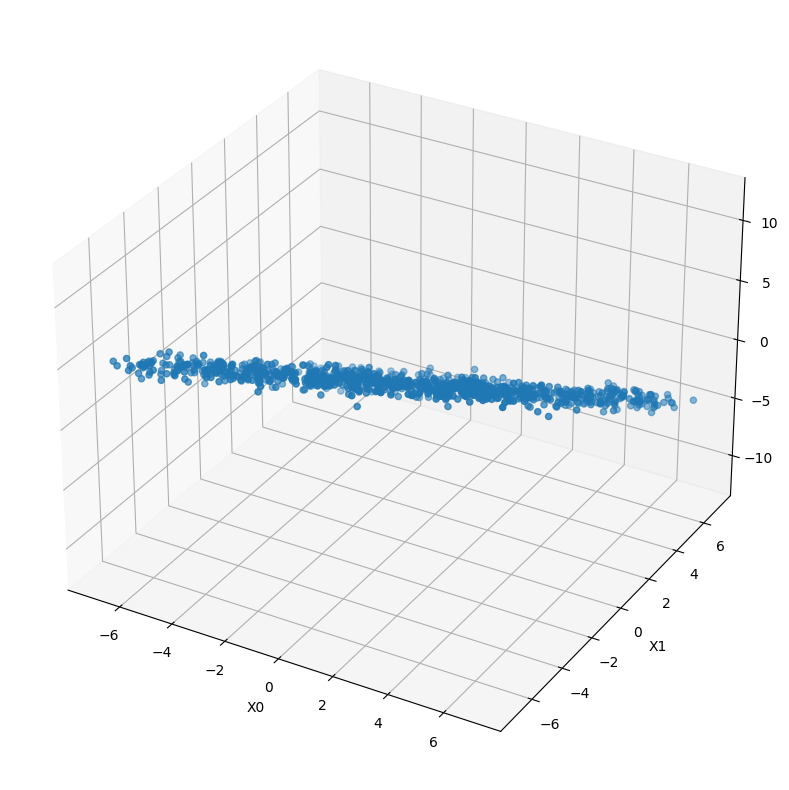

In [27]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

In [28]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y):
    y_pred = X.dot(w)
    return (np.sum((y_pred - y)**2)) / len(y)

Реализуем функцию, вычисляющую вектор весов по нормальному уравнению линейной регрессии, и применим ее.
$$w = (X^{T}X)^{-1}X^{T}y.$$


In [29]:
normal_eq_w = np.linalg.inv(np.dot(X.T, X)) @ X.T @ Y
print(f'Веса {normal_eq_w}')
print(f'В случае использования нормального уравнения функционал ошибки составляет ', end='')
print(f'{round(mserror(X, normal_eq_w, Y), 4)}')

Веса [ 0.46622325 -1.18317886]
В случае использования нормального уравнения функционал ошибки составляет 0.2413


In [30]:
w_true

array([ 0.47143516, -1.19097569])

Обучим линейную регрессию путем градиентного спуска и получим графики изменения весов и ошибки

В случае многомерной регрессии (при количестве признаков больше 1) при оптимизации функционала ошибки

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}}$$

формула вычисления градиента принимает вид

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

In [31]:
# возьмем нулевые начальные веса
w = np.zeros(n_features)

w = np.array([3, -2])
w

array([ 3, -2])

In [32]:
# возьмем нулевые начальные веса
# w = np.zeros(n_features)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(X, w)
    dQ = 2 / Y.shape[0] * np.dot(X.T, y_pred - Y)
    new_w = w - eta * dQ
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    error = mserror(X, new_w, Y)

    w_list.append(new_w.copy())
    errors.append(error)

    print(f'Iter {iter_num}: error - {error}, weights: {new_w}')

    iter_num += 1
    w = new_w

w_list = np.array(w_list)
w_pred = w_list[-1]

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

Iter 0: error - 52.57532993948998, weights: [ 2.13792276 -1.78281495]
Iter 1: error - 23.536285284241472, weights: [ 1.57055571 -1.619028  ]
Iter 2: error - 10.652949399695048, weights: [ 1.19666767 -1.49742124]
Iter 3: error - 4.912585909598192, weights: [ 0.94996426 -1.4082256 ]
Iter 4: error - 2.344551472559416, weights: [ 0.7869746  -1.34343849]
Iter 5: error - 1.1913853411542, weights: [ 0.67915687 -1.29675459]
Iter 6: error - 0.6717619426547363, weights: [ 0.60774704 -1.26333771]
Iter 7: error - 0.4368704464894829, weights: [ 0.56039323 -1.23955069]
Iter 8: error - 0.3303811835958303, weights: [ 0.52895404 -1.22269874]
Iter 9: error - 0.2819765955867633, weights: [ 0.50805645 -1.21080865]
Iter 10: error - 0.2599220948605764, weights: [ 0.49414994 -1.20244911]
Iter 11: error - 0.2498520278593551, weights: [ 0.4848854  -1.19658995]
Iter 12: error - 0.2452452885478847, weights: [ 0.47870664 -1.19249442]
Iter 13: error - 0.2431342779217668, weights: [ 0.47458154 -1.18963852]
Iter 14:

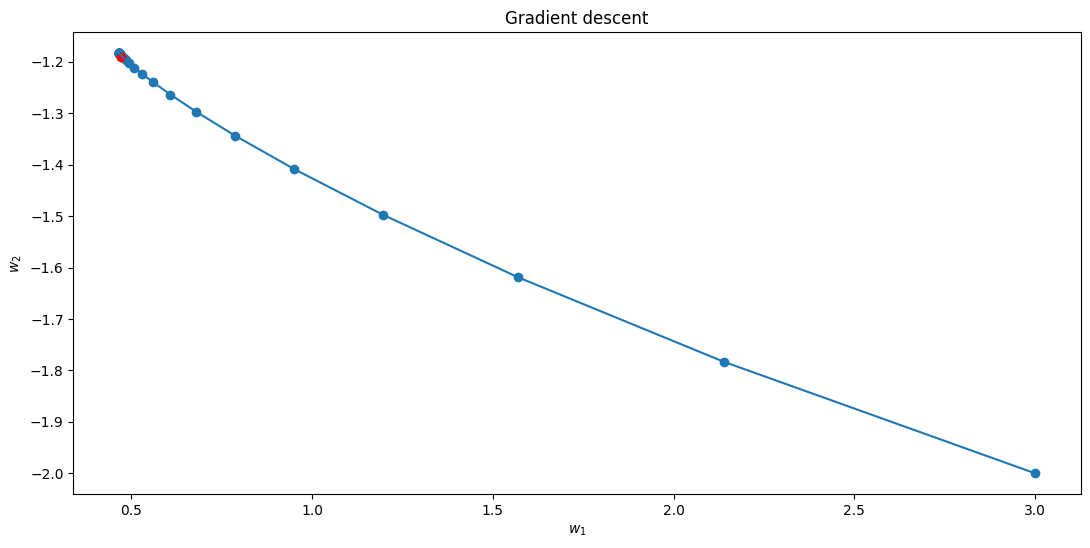

In [33]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

После каждой итерации значения искомых весов приближаются к истинным, однако, не становятся им равны из-за шума, добавленного в вектор ответов.

Text(0, 0.5, 'MSE')

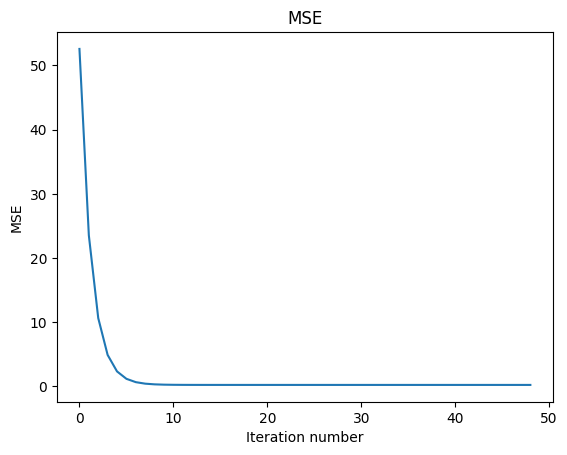

In [34]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Видно, что изменение монотонно и начинается с высокой точки, после определенного количества итераций выходя на асимптоту.

In [35]:
np.arange(-3.0, 4.0, 0.05).shape

(140,)

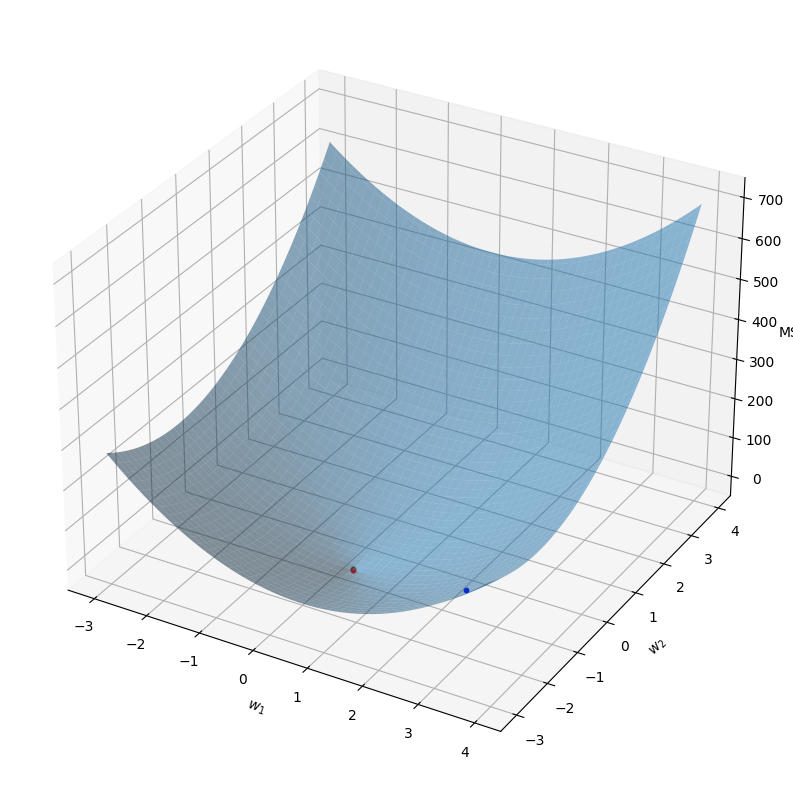

In [36]:
def mse_manual(w1, w2, Y):
    w = np.array([w1, w2])
    y_pred = X.dot(w)
    return (sum((y_pred - Y)**2)) / len(y_pred)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
w1 = w2 = np.arange(-3.0, 4.0, 0.05)
w1, w2 = np.meshgrid(w1, w2)

zs = np.array([mse_manual(i, j, Y) for i, j in zip(np.ravel(w1), np.ravel(w2))])
Z = zs.reshape(w1.shape)

ax.scatter(w_list[0][0], w_list[0][1], mse_manual(w_list[0][0], w_list[0][1], Y), c='b', s=10)
ax.scatter(w_true[0], w_true[1], mse_manual(w_true[0], w_true[1], Y), c='r', s=10)
ax.scatter(w_pred[0], w_pred[1], mse_manual(w_pred[0], w_pred[1], Y), c='g', s=10)
ax.plot_surface(w1, w2, Z, alpha=.5)

ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_2$')
ax.set_zlabel('MSE')

plt.show()

Очень важно при использовании метода градиентного спуска правильно подбирать шаг. Если длина шага будет слишком мала, то метод будет слишком медленно приближаться к правильному ответу, и потребуется очень большое количество итераций для достижения сходимости. Если же длина наоборот будет слишком большой, появится вероятность "перепрыгивания" алгоритма через минимум функции или вообще отсутствия сходимости градиентного спуска.

Применяется методика использования переменного размера шага: на начальных этапах берется большой шаг, который с увеличением количества итераций снижается. Одна из таких методик - вычисление на каждой итерации размера шага по формуле

$$\eta_{k} = \frac{c}{k},$$

где $c$ - некоторая константа, а $k$ - номер шага.

## Дополнительные материалы

1. [Математическое описание метода градиентного спуска](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0)
8. [Реализация модели линейная регрессия. Видео](https://youtu.be/KJA9A1q9l7E)